# Exercise 3

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Wednesday, 20/05/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * basics with *numpy*
 * how to create proper plots with *matplotlib*

Put in here your group number: 

Group 12

# 1. Numerical integration (15 Points)

We want to estimate the integral:

$$\int_1^2 \frac{1}{x}{\rm d} x = \log 2 \approx 0.693147 $$

For the calculation we want to compare different mathematical methods. Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a decomposition of the interval $I$. The integral area below the function can be divided into a finite number of small areas $A_i$. The sum of these areas approximates the integral:
$$ \int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1} A_i$$

These numerical approximations can be reduced in the way how the small areas are calculated:
1. The simplest approximation is the use of the Riemann sums. The area below the function $f$ will be described by a series of rectangles. One rectangle between $x_i$ and $x_{i+1}$ can be calculated with:
    $$A_i = (x_{i+1}-x_i) \cdot f\left(\frac{x_i+x_{i+1}}2\right)$$
2. Instead of a rectangle one can also define a trapezium:
    $$A_i = (x_{i+1}-x_i) \cdot \left( \frac{f(x_i)+f(x_{i+1})}{2} \right)$$
3. A further approximation is the Simpsons method in which the part below the function is approximated by a parabel. The area can be calculated by:
    $$A_i = (x_{i+1}-x_i)\cdot \frac{1}{6} \left( f(x_i) + 4\cdot f\left(\frac{x_i+x_{i+1}}2\right) + f(x_{i+1}) \right)$$
    
    
To illustrate the different approximations, the small areas for each method are drawn for the $f(x)=\frac{1}{x}$ function:
<table>
<tr>
    <td>
        <img src="riemann.png">
    </td>
    <td>
        <img src="trapez.png">
    </td>
    <td>
        <img src="simpson.png">
    </td>
</tr>
</table>
    
**Your tasks:**

 Implement each of the approximation for the given integral with numpy arrays and compare the results. Which method gives the best value in comparison to the exact value of $\log 2$ (use a print command for your decision!)?  You can assume a separation of the intervall $I=[a;b]$ in $n=50$ equally spaced parts. Store the calculated values for the integrals in the variables *int_riemann*, *int_trapezium*, and *int_simpsons* for the validation.
 
**Hints:**

For the calculation of the function values $f(x)$ we pre defined a simple function which you can use. You can use this function with ```y=f(x)```. ```x``` can be a float or integer variable or a numpy-array!

In [1]:
import numpy as np

def f(x):
    """The simple function that returns 1/x."""
    return 1/x

#Initialization of variables.
a, b = 1, 2
n = 50
int_riemann = 0
int_trapezium = 0
int_simpsons = 0

#The interval [a,b] is split in n sub intervals.
interval = np.linspace(a, b, n)

#Array that contains integer numbers that label the start and end of the sub intervals.
index = np.linspace(0, n-2, n-1, dtype = np.int64 )

#We compute the partial areas for the three methods and we sum them. We notice that if the array 
#"interval" has length n, the last element is denoted by interval[n-1], not by interval[n].
for i in index:
    int_riemann = int_riemann + (interval[i+1]-interval[i])*f((interval[i]+interval[i+1])/2)
    int_trapezium = int_trapezium + (interval[i+1]-interval[i])*(f(interval[i])+f(interval[i+1]))/2
    int_simpsons = int_simpsons + ((interval[i+1]-interval[i])/6)*(f(interval[i])+
                   4*f((interval[i]+interval[i+1])/2)+f(interval[i+1]))

print(int_riemann, int_trapezium, int_simpsons)


0.6931341663352326 0.6931732100255119 0.6931471808986588


We can see that the Simpsons rule yields the best value. We expected this, since it is the most sophisticated method among the three.

In [2]:
assert(np.isclose(int_riemann,0.6931341663352333))

In [3]:
assert(np.isclose(int_trapezium,0.6931732100255125))

In [4]:
assert(np.isclose(int_simpsons,0.6931471808986598))

# 2. Proper plotting (20 Points)

One typical problem in science publishing is the quality of the plot added to a publication. During data reduction and analysis scientist focus more on the algorithms and explanations than on the plots itself which are on the other hand an important driver of the presentation of science results.

Thomas created a nice [notebook](https://binderhub.astro.uni-bonn.de/v2/gh/terben/Python-cheat-sheets/master\?filepath\=publication_quality_plots_with_matplotlib.ipynb) which focus on this topic and gives a nice example how to produce plots with high quality directly for science publications. Please read this notebook carefully and 

In this task you should make use of the presented ```homogenise_plot.py``` module which is in the same directory as this notebook and recreate a plot and integrate the plot in a sample $\LaTeX$ document. Use this command to import this modul:
```Python
import homogenise_plot as hp
```
As described in Thomas notebook, you have the command ```hp.homogenise_plot(<parameters>)``` available to change the plot-Parameter. 

**Your task:**

The example plot you should recreate is the plot of the density distribution of a star depending on the radius. We have prepared a data file which you can use ```ascii_profile_example.dat```. The important colums of the file are the first (density) and the second (radius) column. The data should be plotted in a line plot (```plt.plot(...)```). The data needs to be plotted in a *log-log* style. Therefore use the functions ```plt.xscale(...)``` and ```plt.yscale(...)``` respectively. Your first plot should look like this:

<img src="sample_plot.png" style="width:55%;" />

Please change the group number in the title to your group number! 

Then save this image as ```mass_density_plot.png```. Now use the ```homogenise_plot``` module to create the same plot as ```mass_density_plot_two_columns.png``` for a *two column* $\LaTeX$-Document. Use for the physical units of both axes the 
the typeset rules from $\LaTeX$ `siunitx` package. Write a short $\LaTeX$-document in which you include the two plots and describe in the text what the main differences are between the native matplotlib-plot and the optimized plot.


**Hints:**
 * You need several commands for the plotting. Have a look at the documentation of the [pyplot-functions](https://matplotlib.org/3.2.1/api/pyplot_summary.html) and their parmaters.
 * Because of some matplotlib-problems you should use ```hp.revert_params()``` after you have used ```plt.savefig(...)``` to restore the original matplotlib settings
 * You can write the code to generate all plots in one code cell, but then use ```plt.show()``` after you have saved the plot in a file!

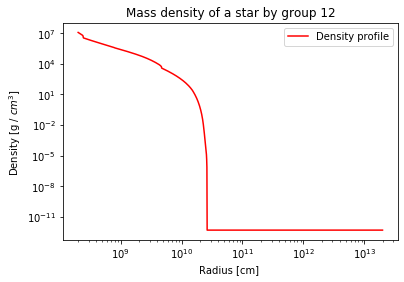

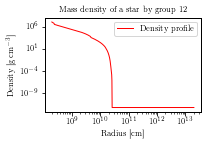

In [5]:
#We start with the "naive" matplotlib plot.

%matplotlib inline
import matplotlib.pyplot as plt
import homogenise_plot as hp
import numpy as np

#It imports the data from an external file.
data = np.loadtxt("./ascii_profile_example.dat")

#It stores the columns of the file in two arrays.
radius = data[:,0]
density = data[:,1]

#It sets a logarithmic scale on the x and y axis.
plt.xscale("log")
plt.yscale("log")

#It plots the data, labels the axis and gives a title.
plt.plot(radius, density, color = 'red', label="Density profile")
plt.xlabel("Radius [cm] ")
plt.ylabel("Density [g / $cm^3$] ")
plt.title("Mass density of a star by group 12")

#It makes sure that the legend is displayed.
plt.legend()

#It saves the figure.
plt.savefig("./mass_density_plot.png")

#It makes sure that the figure is shown.
plt.show()


#Now we use the homogenise_plot module to create the same plot for a two column Latex document.

# It creates a homogenised plot for a columnwidth of 2.8 inch:
hp.homogenise_plot(fig_width=2.8)

#We typeset units with the LaTeX siunitx-package.
plt.xscale("log")
plt.yscale("log")
plt.plot(radius, density, color = 'red', label="Density profile")
plt.xlabel(r"Radius [\si{\centi\metre}] ")
plt.ylabel(r"Density [\si{\gram\per\cubic\centi\meter}]")
plt.title("Mass density of a star by group 12")
plt.legend()

#Saves the figure and shows it
plt.savefig("./mass_density_plot_two_columns.png")
plt.show()
hp.revert_params()


